### Images

In [5]:
import matplotlib.pyplot as plt

In [72]:
# dict of name and image numpy arrays
images = {
    name: plt.imread('data/' + name)
    for name in ['1.jpg', '2.jpg', '3.jpg'] 
}

In [73]:
img_shape = images['1.jpg'].shape
print(img_shape)

(3024, 4032, 3)


In [74]:
import h5py

In [75]:
f = h5py.File('test.hdf5', 'a')

In [76]:
# create a group
img_grp = f.create_group('plants')

In [77]:
# store all images under this group
for k, v in images.items():
    img_grp.create_dataset(k, shape = img_shape, data = v)

In [78]:
f.close()

In [80]:
# read them out
f = h5py.File('test.hdf5', 'r')
print(f.keys())
def visit_func(name):
    print(name)
f.visit(visit_func)

<KeysViewHDF5 ['plants']>
plants
plants/1.jpg
plants/2.jpg
plants/3.jpg


In [91]:
# read one
grp = f['plants']
f3 = grp['3.jpg']
f3

<HDF5 dataset "3.jpg": shape (3024, 4032, 3), type "|u1">

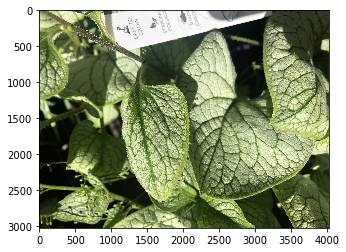

In [92]:
# display
ax = plt.imshow(f3)

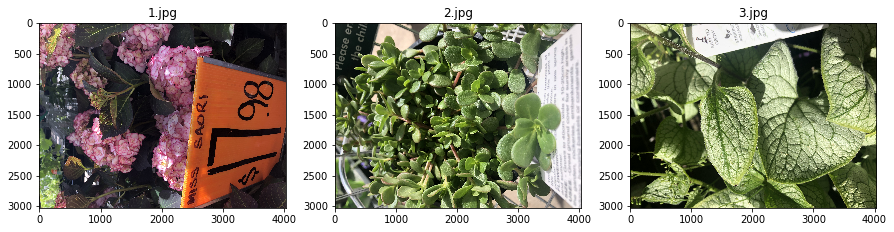

In [117]:
# read multiple and plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,20))
ax_idx = 0
for k in grp.keys():
    ax = axes[ax_idx]
    ax.imshow(grp[k])
    ax.set_title(k)
    ax_idx = ax_idx + 1

In [118]:
f.close()

In [64]:
# delete a group
f = h5py.File('test.hdf5', 'a')
del f['plants']

In [66]:
f.flush()

In [67]:
f.close()

### Text

In [139]:
f = h5py.File('test2.hdf5', 'a')


In [140]:
s= 'hello'
s_dset = f.create_dataset('name', data=str(s))


In [143]:
# assign attributes
s_dset.attrs['label'] = u'greetings'
f.flush()

In [144]:
s1 = f['name']


In [145]:
s1[()]

'hello'

In [146]:
s1.attrs['label']

'greetings'

In [137]:
f.close()